## Pulsar Candidate Selection

In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%matplotlib inline

In [2]:
import os, time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import *
import itertools
import warnings
warnings.filterwarnings("ignore")

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter,colmap=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    if colmap:
        plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Prepare data

In [4]:
raw_data = pd.read_csv('pulsar_data.csv')
clean_data = raw_data.dropna(axis = 0)

In [5]:
raw_data.shape, clean_data.shape
raw_data.head(5)
clean_data.head(5)

((2390, 8), (2362, 8))

id       one         two      three     four      five        six  yn
0   1  2.618565  139.231965        NaN -0.97228  0.976167   6.568446   0
1   1  3.429968    0.810326  -6.205871  1.00000  0.999722  13.001498   1
2   2  1.795996   62.873381  -8.657544  1.00000  0.806316   6.752381   0
3   2  2.468271   69.807594 -10.577217  1.00000  0.956260  16.994025   1
4   3  1.932513   49.488146  -9.922344  1.00000  0.847660   9.571176   0

id       one        two      three  four      five        six  yn
1   1  3.429968   0.810326  -6.205871   1.0  0.999722  13.001498   1
2   2  1.795996  62.873381  -8.657544   1.0  0.806316   6.752381   0
3   2  2.468271  69.807594 -10.577217   1.0  0.956260  16.994025   1
4   3  1.932513  49.488146  -9.922344   1.0  0.847660   9.571176   0
5   3  4.381637   0.101775  -4.154478   1.0  1.000000   9.134662   1

In [6]:
data_X_raw = clean_data.iloc[:, 1:-1]
data_y = clean_data.iloc[:, -1]
data_X.shape, data_y.shape
# data_X.head(5)
# data_y.head(5)

NameError: name 'data_X' is not defined

In [7]:
scaler = MinMaxScaler()
data_X = scaler.fit_transform(data_X_raw.values)
data_X = pd.DataFrame(data_X, columns=['snr', 'duty_cycle', 'pdr', 'dispersion','persistence', 'rms'])
data_X.head()
data = data_X.copy()
data['class'] = data_y
data.head()

snr  duty_cycle       pdr  dispersion  persistence       rms
0  0.316367    0.000866  0.445108         1.0     0.999173  0.252314
1  0.060045    0.069065  0.282151         1.0     0.424151  0.060871
2  0.165505    0.076684  0.154556         1.0     0.869954  0.374626
3  0.081460    0.054356  0.198083         1.0     0.547072  0.147225
4  0.465656    0.000088  0.581458         1.0     1.000000  0.133853

snr  duty_cycle       pdr  dispersion  persistence       rms  class
0  0.316367    0.000866  0.445108         1.0     0.999173  0.252314    NaN
1  0.060045    0.069065  0.282151         1.0     0.424151  0.060871    1.0
2  0.165505    0.076684  0.154556         1.0     0.869954  0.374626    0.0
3  0.081460    0.054356  0.198083         1.0     0.547072  0.147225    1.0
4  0.465656    0.000088  0.581458         1.0     1.000000  0.133853    0.0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=10)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1889, 6), (473, 6), (1889,), (473,))

In [10]:
X_train.head()

snr  duty_cycle       pdr  dispersion  persistence       rms
1831  0.169086    0.001059  0.421920         1.0     0.879020  0.364337
2074  0.028389    0.106035  0.119004         1.0     0.194390  0.871227
2338  0.374966    0.000136  0.564279         1.0     0.999985  0.187321
2123  0.245370    0.000759  0.450871         1.0     0.983711  0.294123
500   0.174917    0.000153  0.562140         1.0     0.892834  0.553473

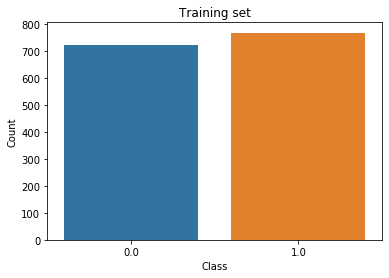

In [11]:
# train_data = pd.DataFrame(X_train)
train_data = X_train.copy()
train_data["yn"] = y_train
sns.countplot(x='yn', data=train_data)
plt.title('Training set')
plt.xlabel('Class')
plt.ylabel('Count');

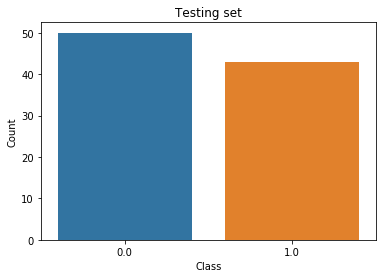

In [12]:
# test_data = pd.DataFrame(X_test)
test_data = X_test.copy()
test_data["yn"] = y_test
sns.countplot(x='yn', data=test_data)
plt.title('Testing set')
plt.xlabel('Class')
plt.ylabel('Count');

## data visualization

In [63]:
train_data.head()

snr  duty_cycle       pdr  dispersion  persistence       rms   yn
1831  0.169086    0.001059  0.421920         1.0     0.879020  0.364337  1.0
2074  0.028389    0.106035  0.119004         1.0     0.194390  0.871227  0.0
2338  0.374966    0.000136  0.564279         1.0     0.999985  0.187321  0.0
2123  0.245370    0.000759  0.450871         1.0     0.983711  0.294123  1.0
500   0.174917    0.000153  0.562140         1.0     0.892834  0.553473  0.0

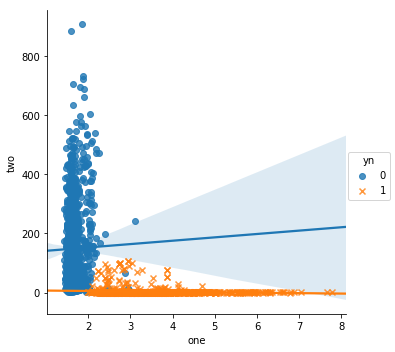

In [72]:
sns.lmplot(x="one", y="two", hue="yn", data=clean_data, markers=["o", "x"])

In [ ]:
plt.plot(train_data[:, 0], train_data[:, 1], 'g.',
             train_data[data_size:2*data_size, 0], train_data[data_size:2*data_size, 1], 'b*',
             test_data[:, 0], test_data[:, 1], 'ms')

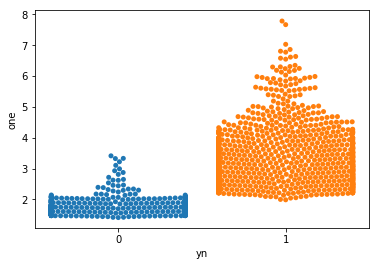

In [42]:
sns.swarmplot(x="yn", y="one", data=clean_data)

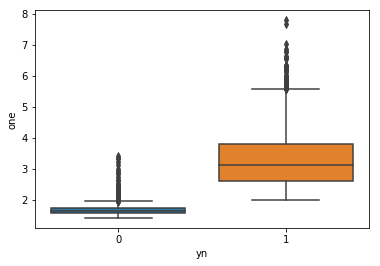

In [43]:
sns.boxplot(x="yn", y="one", data=clean_data)

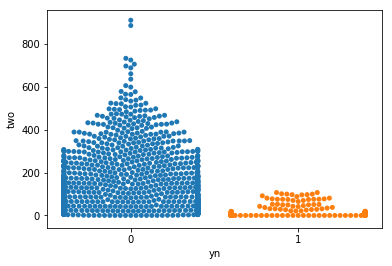

In [45]:
sns.swarmplot(x="yn", y="two", data=clean_data)

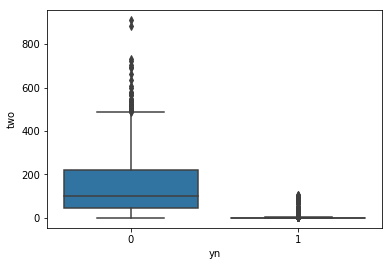

In [44]:
sns.boxplot(x="yn", y="two", data=clean_data)

/Users/shao/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


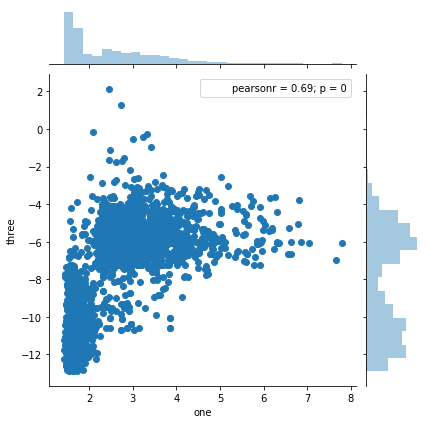

In [49]:
sns.jointplot(x="one", y="three", data=clean_data)

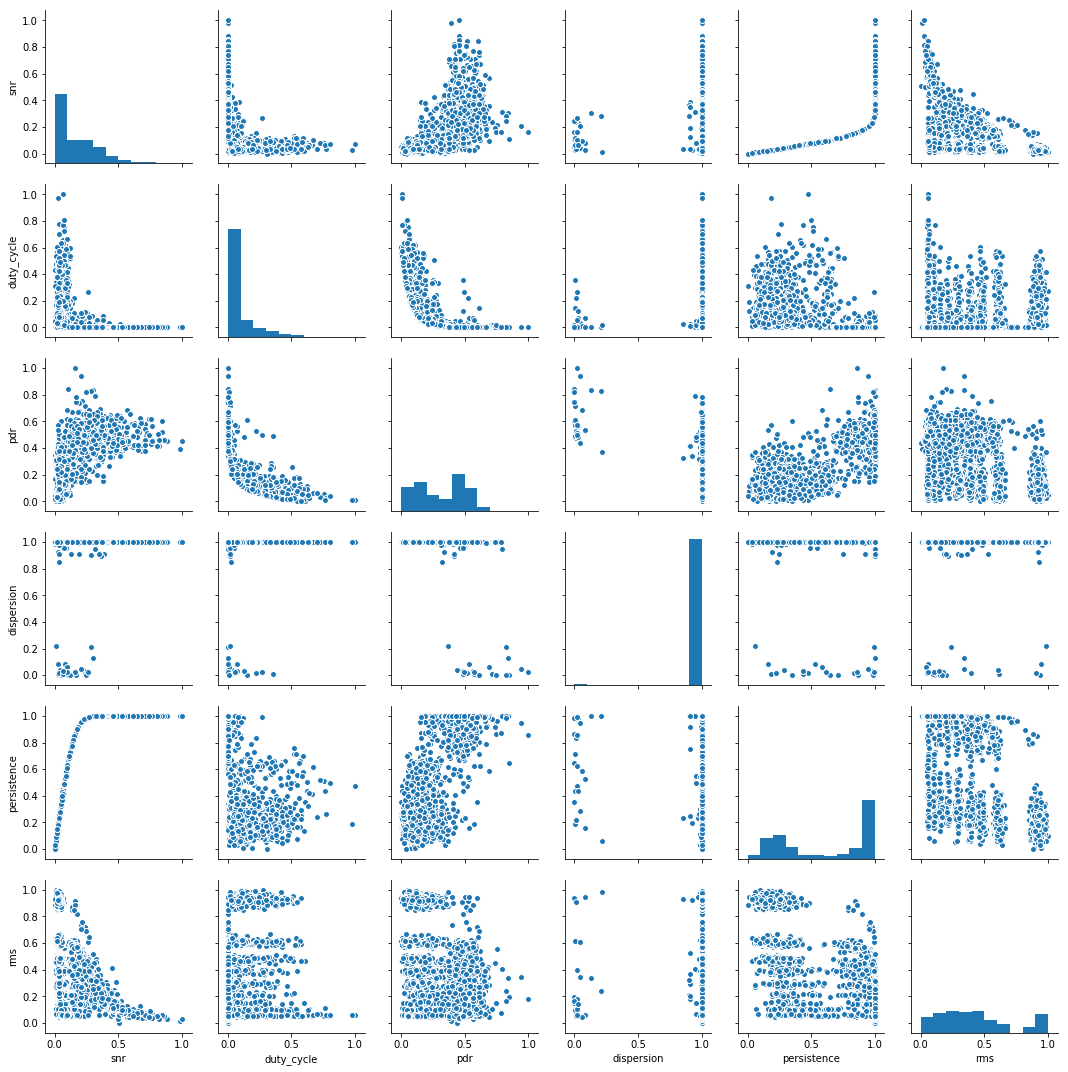

In [40]:
sns.pairplot(data_X);

## Learning Algorithms

### KNN

#### Initilize model

In [13]:
model = KNeighborsClassifier();
tuned_parameters = {'n_neighbors': [2, 4, 6, 10, 15]}

In [14]:
list(tuned_parameters.keys())[0]
list(tuned_parameters.values())[0]

'n_neighbors'

[2, 4, 6, 10, 15]

#### Model training

In [15]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 4, 6, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Run Time: 0.4152s
Validation Accuracy：99.471%
Testing Accuracy：100.000%
More classification metrics:
The recall score is    1.0000
The precision score is 1.0000
The accuracy is        1.0000
The f1 score is        1.0000
The FPR is             0.0000e+00


#### learning curve

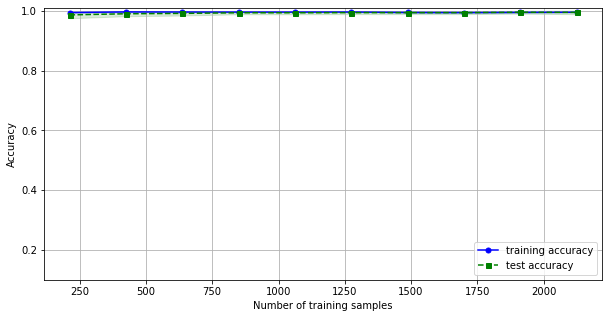

In [16]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

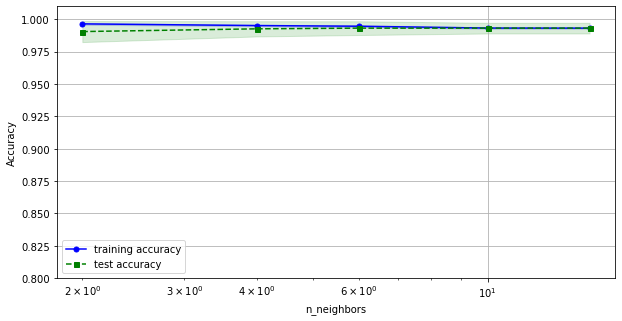

In [17]:
para_name = list(tuned_parameters.keys())[0]
param_range = list(tuned_parameters.values())[0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, 
                                             param_name=para_name,
                                             param_range=param_range, 
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel(para_name)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8, 1.01]);

In [18]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)

### SVM-linear

#### initilization

In [19]:
model = SVC(kernel='linear')
tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100]}

#### Model training

In [20]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Run Time: 0.2438s
Validation Accuracy：99.312%
Testing Accuracy：99.154%
More classification metrics:
The recall score is    0.9955
The precision score is 0.9865
The accuracy is        0.9915
The f1 score is        0.9910
The FPR is             1.1858e-02


#### learning curve

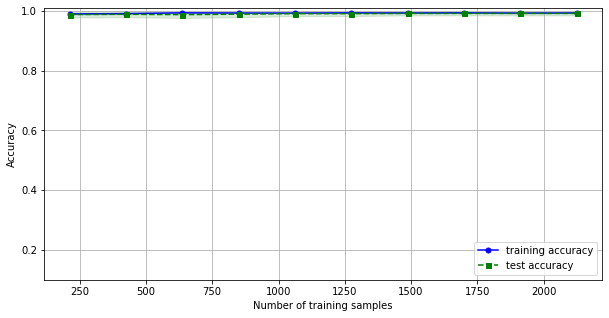

In [21]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

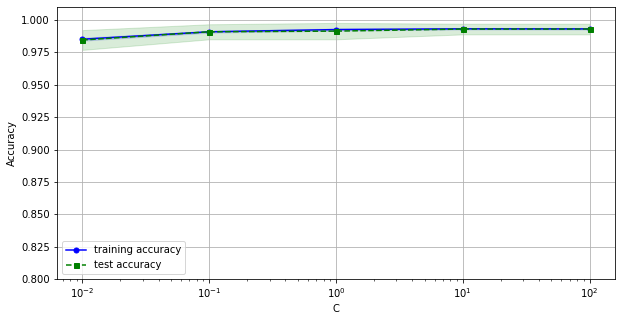

In [22]:
para_name = list(tuned_parameters.keys())[0]
param_range = list(tuned_parameters.values())[0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, 
                                             param_name=para_name,
                                             param_range=param_range, 
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel(para_name)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8, 1.01]);

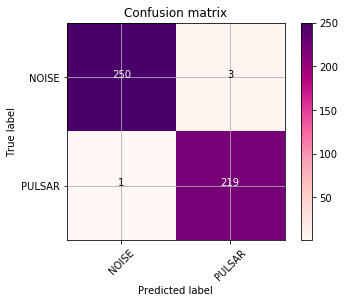

In [23]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)

### SVM-rbf

#### initilization

In [24]:
model = SVC(kernel='rbf')
tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100]}

#### Model training

In [25]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Run Time: 0.2875s
Validation Accuracy：99.312%
Testing Accuracy：99.366%
More classification metrics:
The recall score is    1.0000
The precision score is 0.9865
The accuracy is        0.9937
The f1 score is        0.9932
The FPR is             1.1858e-02


#### learning curve

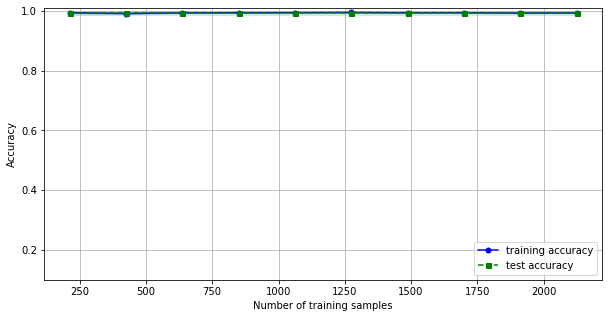

In [26]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

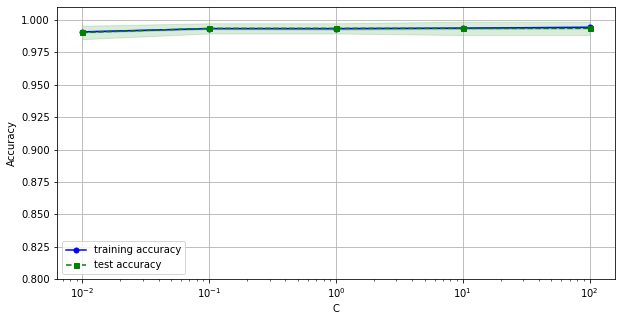

In [27]:
para_name = list(tuned_parameters.keys())[0]
param_range = list(tuned_parameters.values())[0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, 
                                             param_name=para_name,
                                             param_range=param_range, 
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel(para_name)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8, 1.01]);

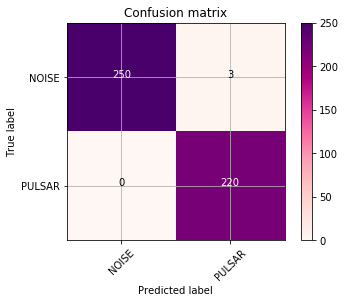

In [28]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)

### DT without proning

#### initilization

In [29]:
model = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {'max_depth': [10, 20, 30]}

#### Model training

In [30]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 20, 30]}, pre_dispatch='2*n_jobs',


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Run Time: 0.1028s
Validation Accuracy：99.947%
Testing Accuracy：98.943%
More classification metrics:
The recall score is    0.9909
The precision score is 0.9864
The accuracy is        0.9894
The f1 score is        0.9887
The FPR is             1.1858e-02


#### learning curve

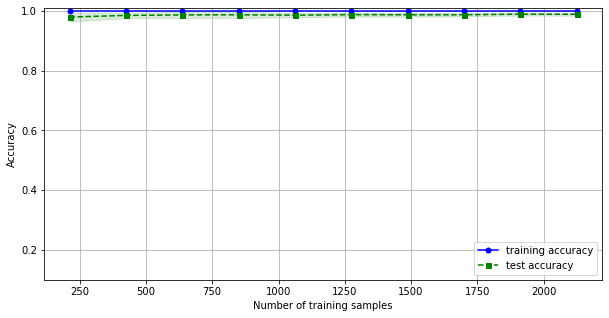

In [31]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

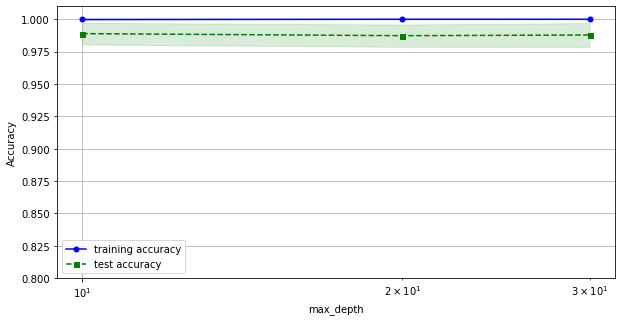

In [32]:
para_name = list(tuned_parameters.keys())[0]
param_range = list(tuned_parameters.values())[0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, 
                                             param_name=para_name,
                                             param_range=param_range, 
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel(para_name)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8, 1.01]);

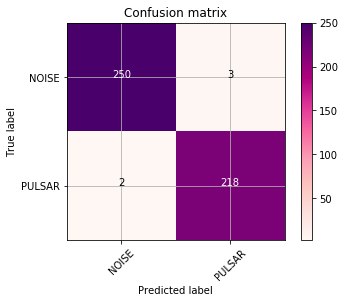

In [33]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)

### DT

#### initilization

In [34]:
model = DecisionTreeClassifier(criterion='gini', min_samples_leaf =10, min_samples_split=10)
tuned_parameters = {'max_depth': [10, 15, 20, 25, 30]}

#### Model training

In [35]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=10,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 15, 20, 25, 30]},
             pr

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Run Time: 0.1458s
Validation Accuracy：99.153%
Testing Accuracy：98.520%
More classification metrics:
The recall score is    0.9864
The precision score is 0.9819
The accuracy is        0.9852
The f1 score is        0.9841
The FPR is             1.5810e-02


#### learning curve

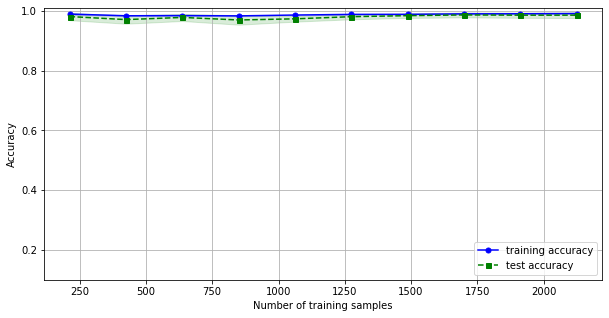

In [36]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

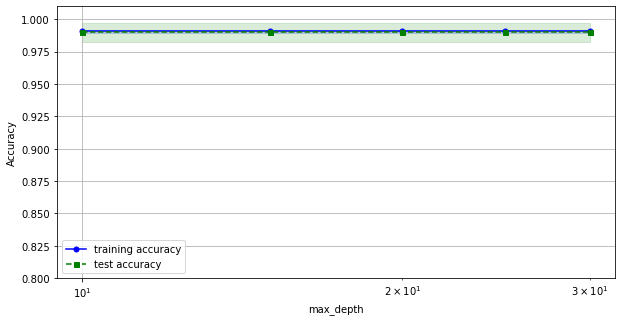

In [37]:
para_name = list(tuned_parameters.keys())[0]
param_range = list(tuned_parameters.values())[0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, 
                                             param_name=para_name,
                                             param_range=param_range, 
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel(para_name)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8, 1.01]);

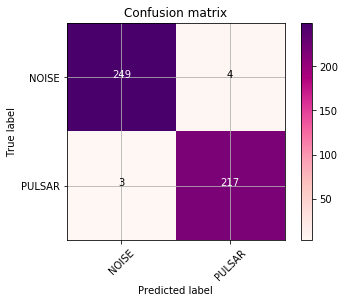

In [38]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)

### GBDT

#### initilization

In [39]:
model = GradientBoostingClassifier(min_samples_leaf=10, subsample=0.8, random_state=10, learning_rate =0.1)
tuned_parameters = {'max_depth': [10, 15, 20, 25, 30], 'min_samples_split': [10, 15, 20, 25, 30]}

#### Model training

In [40]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Run Time: 52.2470s
Validation Accuracy：100.000%
Testing Accuracy：99.577%
More classification metrics:
The recall score is    1.0000
The precision score is 0.9910
The accuracy is        0.9958
The f1 score is        0.9955
The FPR is             7.9051e-03


#### learning curve

In [41]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

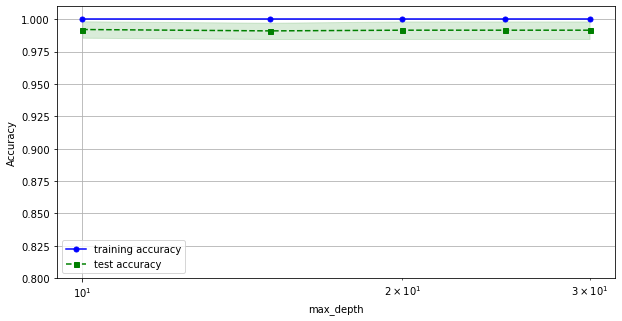

In [42]:
para_name = list(tuned_parameters.keys())[0]
param_range = list(tuned_parameters.values())[0]
train_scores, test_scores = validation_curve(estimator=model, X=X_train, y=y_train, 
                                             param_name=para_name,
                                             param_range=param_range, 
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel(para_name)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.ylim([0.8, 1.01]);

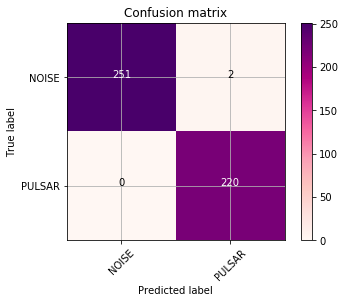

In [43]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)

### NN

#### initilization

In [44]:
model = MLPClassifier(activation='relu', solver='sgd', learning_rate_init=.01, hidden_layer_sizes=(5, 5), max_iter=1000)
tuned_parameters = {'alpha': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}

#### Model training

In [45]:
clf = GridSearchCV(estimator=model,
                   param_grid=tuned_parameters,
                   cv=5,
                   scoring='accuracy',
                   refit=True);
start = time.time()
clf.fit(X_train, y_train)
print(clf.best_estimator_)

# timing
end = time.time()
duration = end - start
print('Run Time: {:.4f}s'.format(duration))

# verification
train_score = clf.score(X_train, y_train)
print('Validation Accuracy：{:.3f}%'.format(train_score * 100))

test_score = clf.score(X_test, y_test)
print('Testing Accuracy：{:.3f}%'.format(test_score * 100))

print("More classification metrics:")
y_pred = clf.predict(X_test)
y_test_cmp = np.array(y_test)

metrc = recall_score(y_test_cmp,y_pred)
metpr = precision_score(y_test_cmp,y_pred)
metac = accuracy_score(y_test_cmp,y_pred)
metf1 = f1_score(y_test_cmp,y_pred)
cm = confusion_matrix(y_test_cmp,y_pred)
metfp = 1.*cm[0,1]/(cm[0,0]+cm[0,1])

print("The recall score is    {0:0.4f}".format(np.mean(metrc)))
print("The precision score is {0:0.4f}".format(np.mean(metpr)))
print("The accuracy is        {0:0.4f}".format(np.mean(metac)))
print("The f1 score is        {0:0.4f}".format(np.mean(metf1)))
print("The FPR is             {0:0.4e}".format(np.mean(metfp)))

GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(5, 5),
                                     learning_rate='constant',
                                     learning_rate_init=0.01, max_fun=15000,
                                     max_iter=1000, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Run Time: 16.4137s
Validation Accuracy：99.312%
Testing Accuracy：99.154%
More classification metrics:
The recall score is    0.9955
The precision score is 0.9865
The accuracy is        0.9915
The f1 score is        0.9910
The FPR is             1.1858e-02


#### learning curve

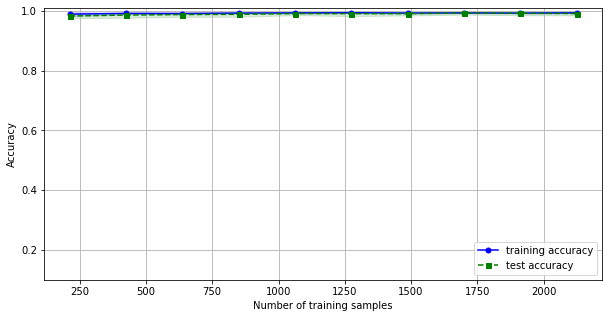

In [46]:
train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=data_X, y=data_y, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,5))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy');
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue');
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='test accuracy');
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green');
plt.grid();
plt.xlabel('Number of training samples');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.ylim([0.1, 1.01]);

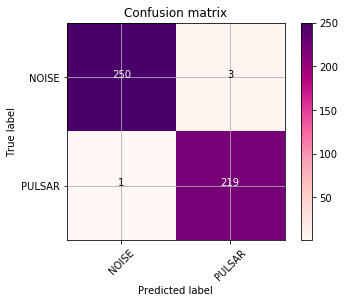

In [47]:
plot_confusion_matrix(cm,['NOISE','PULSAR'],cmap=plt.cm.RdPu,colmap=True)
plt.grid(None)